In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [13]:
traces = {"bc": ["bc-0","bc-12","bc-3","bc-5"],"bfs":["bfs-10","bfs-14","bfs-3","bfs-8"],"cc":["cc-13","cc-14","cc-5","cc-6"],"sssp":["sssp-10","sssp-14","sssp-3","sssp-5"]}
bins = ["coverage_-2","coverage_-1","coverage_0","coverage_1","coverage_2"]
totLines = 65536

final_data_allocated = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}
final_data_shared = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}
final_data_coreOne = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}
final_data_coreZero = {"bc": [],"bfs":[],"cc":[],"sssp":[],"average":[]}

for binary in bins:
    final_data_allocated["average"].append(0)
    final_data_shared["average"].append(0)
    final_data_coreOne["average"].append(0)
    final_data_coreZero["average"].append(0)

for trace in traces:
    for binary in bins:
        allocatedLines = 0.0
        sharedLines = 0.0
        uniqueCoreOneLines = 0.0
        uniqueCoreZeroLines = 0.0
        for trace_sim in traces[trace]:
            data = pd.read_csv("line_counts/" + binary + trace_sim + ".trace.csv")
            core_0 = np.array(data.sort_values([" Core 0 lines "," Core 1 lines"],ascending=[True,False])[" Core 0 lines "])
            core_1 = np.array(data.sort_values([" Core 0 lines "," Core 1 lines"],ascending=[True,False])[" Core 1 lines"])
            allocatedLines += ((len(data[(data[" Core 0 lines "] != 0) | (data[" Core 1 lines"] != 0)]))/(65536 * len(traces[trace])))
            sharedLines += ((len(data[(data[" Core 0 lines "] != 0) & (data[" Core 1 lines"] != 0)]))/(65536*len(traces[trace])))
            uniqueCoreOneLines += ((len(data[(data[" Core 1 lines"] != 0) & (data[" Core 0 lines "] == 0)]))/(65536 * len(traces[trace])))
            uniqueCoreZeroLines += ((len(data[(data[" Core 1 lines"] == 0) & (data[" Core 0 lines "] != 0)]))/(65536 * len(traces[trace])))
        final_data_allocated[trace].append(allocatedLines)
        final_data_shared[trace].append(sharedLines)
        final_data_coreOne[trace].append(uniqueCoreOneLines)
        final_data_coreZero[trace].append(uniqueCoreZeroLines)
        

for trace in traces:
    for i in range(len(bins)):
        final_data_allocated["average"][i] += final_data_allocated[trace][i]/len(traces[trace])
        final_data_shared["average"][i] += final_data_shared[trace][i]/len(traces[trace])
        final_data_coreOne["average"][i] += final_data_coreOne[trace][i]/len(traces[trace])
        final_data_coreZero["average"][i] += final_data_coreZero[trace][i]/len(traces[trace])

print("final allocated fractions: ",final_data_allocated)
print("final shared fraction: ",final_data_shared)
print("final core1 unique fraction: ",final_data_coreOne)
print("final core0 unique fraction: ",final_data_coreZero)

final allocated fractions:  {'bc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893394470214844], 'bfs': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893356323242188], 'cc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893165588378906], 'sssp': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893280029296875], 'average': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669456481933594, 0.8893299102783203]}
final shared fraction:  {'bc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056427001953125, 0.8440017700195312], 'bfs': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 0.8435897827148438], 'cc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056198120117188, 0.84332275390625], 'sssp': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter
import os
def plot_multibar(data,group_labels ,savepath, is_mpki,ylabel="",round_to = 0.05, ytick_trim=1,delta_round = 0.01,delta_factor = 1):
    # Extracting the keys (workload names) and the values (list of measurements) from the data
    workloads = list(data.keys())
    values = np.array(list(data.values()))
    maximum = np.max(values)
    minimum = np.min(values)

    print(group_labels)
    print(data)
    # print_ascii_table(os.path.basename(savepath),group_labels, data)
    print("Max:" , maximum)
    print("Min:", minimum)
    n_bars = len(workloads)
    n_sets = values.shape[1]  
    bar_width = min(min(0.3,0.8/ n_sets),n_bars*(0.04))  # Width of each bar, divided by the number of sets
    
    index = np.arange(n_bars)
    fig, ax = plt.subplots(figsize=(12, 6),constrained_layout = True)  # Fixed plot size (12x6 inches)
    
    # Plot each set of bars with grayscale colors
    for i in range(n_sets):
        # Grayscale shading: Ensure valid scaling for multiple sets
        gray_shade = 0.5 if n_sets == 1 else 1 - (i / max(1, n_sets))

        # Center bars around the index
        bar_position = index + (i - (n_sets - 1) / 2) * bar_width
        # Plot bars with edge coloring
        ax.bar(bar_position, values[:, i], bar_width, 
            label=(group_labels[i] if group_labels else ""), 
            color=str(gray_shade,), edgecolor='black', linewidth=1.5,zorder=5)
    # Add labels, title, and custom x-axis tick labels
    if ylabel=="":
        ylabel = "LLC MPKI" if is_mpki else "Speedup"
    ax.set_ylabel(ylabel, fontsize=28)

    tick_count = 10
   
    delta = int(((maximum - minimum )/tick_count)/delta_round)*delta_round*delta_factor

    print("Delta:", delta)
    plt.ylim(max(0, (int(minimum / round_to)-1) * round_to),maximum + 1*delta)
    ax.set_yticks(np.arange(max(0, (int(minimum / round_to)-1) * round_to), maximum + delta,delta))
    
    ax.tick_params(axis='y', labelsize=20, labelcolor='black')
    plt.setp(ax.get_yticklabels(), fontweight=500)
    ax.set_xticks(index)
    ax.set_xticklabels(workloads, fontsize=26,rotation=60, ha='center',fontweight=500)  # Center labels under each group of bars
   
    ax.yaxis.set_major_formatter(FormatStrFormatter(f'%.{ytick_trim}f'))

    # Add a grid with dotted lines on the y-axis
    for spine in ax.spines.values():
        spine.set_zorder(10)
        spine.set_edgecolor('black')  # Set color of the border
        spine.set_linewidth(3)  # Set the thickness of the border

    # Add legend at the top of the plot
    
    if(n_sets >1):
        legend = ax.legend(loc='center',bbox_to_anchor=(0.5,1.15), ncol=n_sets,fontsize=26,edgecolor='black',fancybox=False, bbox_transform=ax.transAxes)
        legend.get_frame().set_linewidth(2)
        fig.subplots_adjust(top=0.8,left=0.1, right=0.9)
    else:
        legend = ax.legend(loc='center',bbox_to_anchor=(0.5,1.15), ncol=n_sets,fontsize=26,edgecolor='black',fancybox=False, bbox_transform=ax.transAxes)
        legend.get_frame().set_linewidth(0)
        fig.subplots_adjust(top=0.8,left=0.1, right=0.9)
    # Adjust layout to avoid overlap
    # plt.tight_layout()
    # if(not is_mpki):
    #    plt.axhline(y=1, color='r', linestyle='dotted', linewidth=1.5)
    ax.grid(axis='y', linestyle=':', linewidth=1, color='black', alpha=0.5, zorder=1)
    ax.set_axisbelow(True)

    # plt.text(1.87,4,"0.01",fontsize=26,rotation=90)
    # plt.text(8.87,4,"0.01",fontsize=26,rotation=90)
    # plt.text(4.87,4,"0.05",fontsize=26,rotation=90)
    # Save the plot to the specified path
    plt.savefig(savepath,dpi = 800,bbox_inches='tight')



['-2', '-1', '0', '1', '2']
{'bc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893394470214844], 'bfs': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893356323242188], 'cc': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.966949462890625, 0.8893165588378906], 'sssp': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669418334960938, 0.8893280029296875], 'average': [0.3677215576171875, 0.6078338623046875, 0.7584381103515625, 0.9669456481933594, 0.8893299102783203]}
Max: 0.966949462890625
Min: 0.3677215576171875
Delta: 0.1


/tmp/ipykernel_33340/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


['-2', '-1', '0', '1', '2']
{'bc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056427001953125, 0.8440017700195312], 'bfs': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 0.8435897827148438], 'cc': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056198120117188, 0.84332275390625], 'sssp': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056388854980469, 0.8436393737792969], 'average': [0.047027587890625, 0.1459503173828125, 0.34881591796875, 0.7056350708007812, 0.8436384201049805]}
Max: 0.8440017700195312
Min: 0.047027587890625
Delta: 0.14


/tmp/ipykernel_33340/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


['-2', '-1', '0', '1', '2']
{'bc': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.130615234375, 0.022762298583984375], 'bfs': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.13061141967773438, 0.022945404052734375], 'cc': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.1306304931640625, 0.023090362548828125], 'sssp': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.13061141967773438, 0.022922515869140625], 'average': [0.1608428955078125, 0.2312469482421875, 0.206085205078125, 0.1306171417236328, 0.022930145263671875]}
Max: 0.2312469482421875
Min: 0.022762298583984375
Delta: 0.05


/tmp/ipykernel_33340/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


['-2', '-1', '0', '1', '2']
{'bc': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306915283203125, 0.02257537841796875], 'bfs': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306915283203125, 0.022800445556640625], 'cc': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.13069915771484375, 0.0229034423828125], 'sssp': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306915283203125, 0.02276611328125], 'average': [0.15985107421875, 0.2306365966796875, 0.2035369873046875, 0.1306934356689453, 0.02276134490966797]}
Max: 0.2306365966796875
Min: 0.02257537841796875
Delta: 0.05


/tmp/ipykernel_33340/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


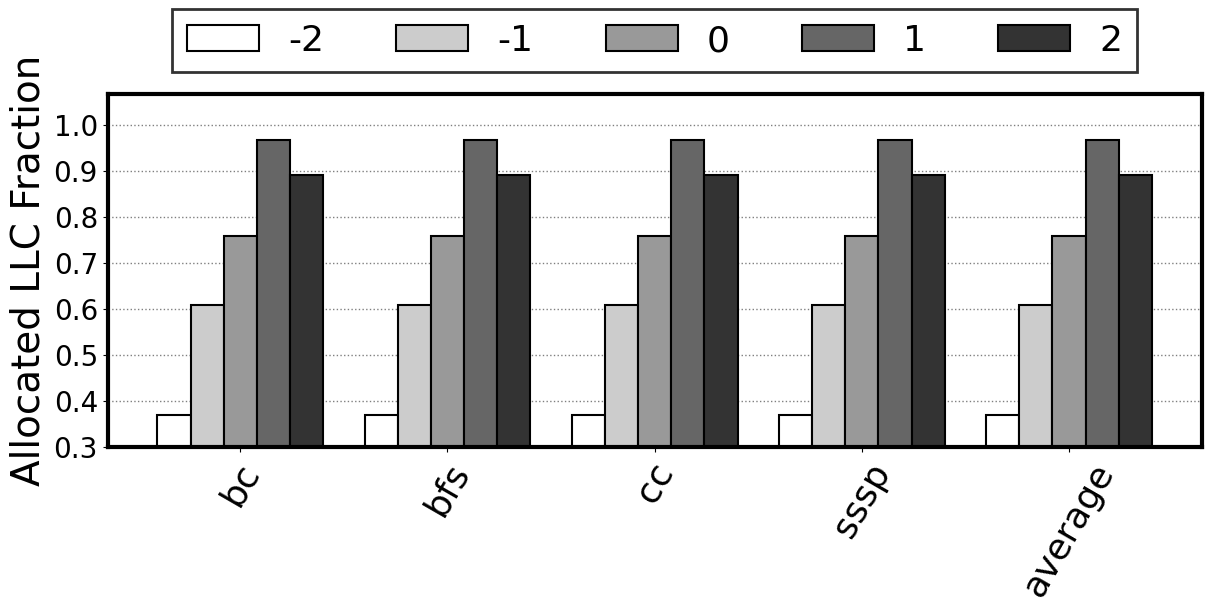

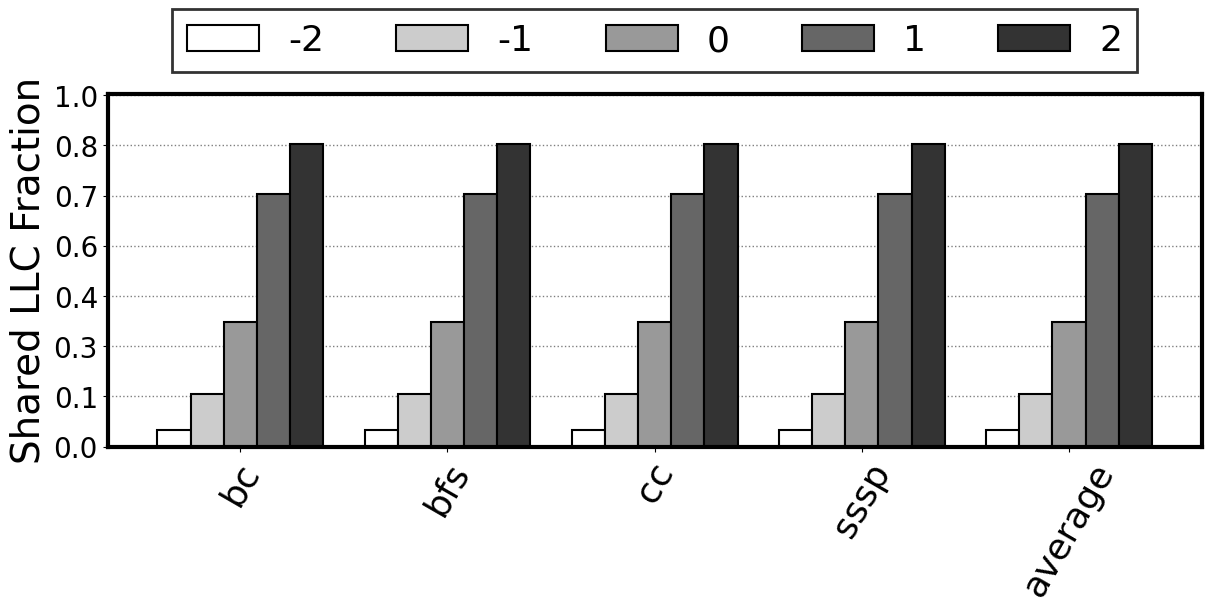

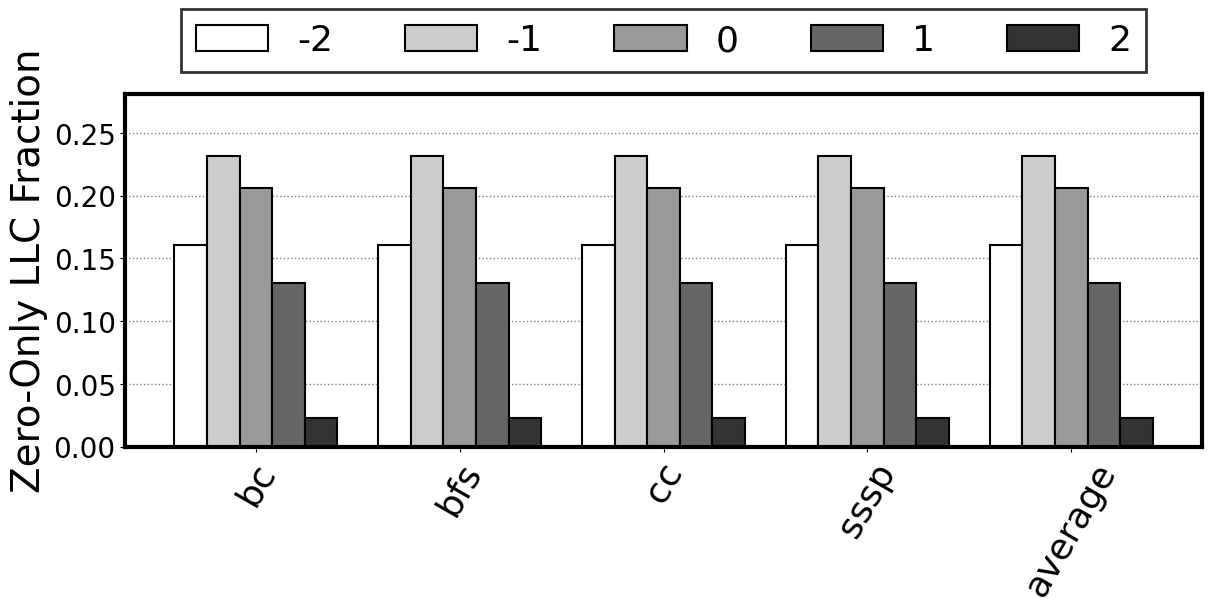

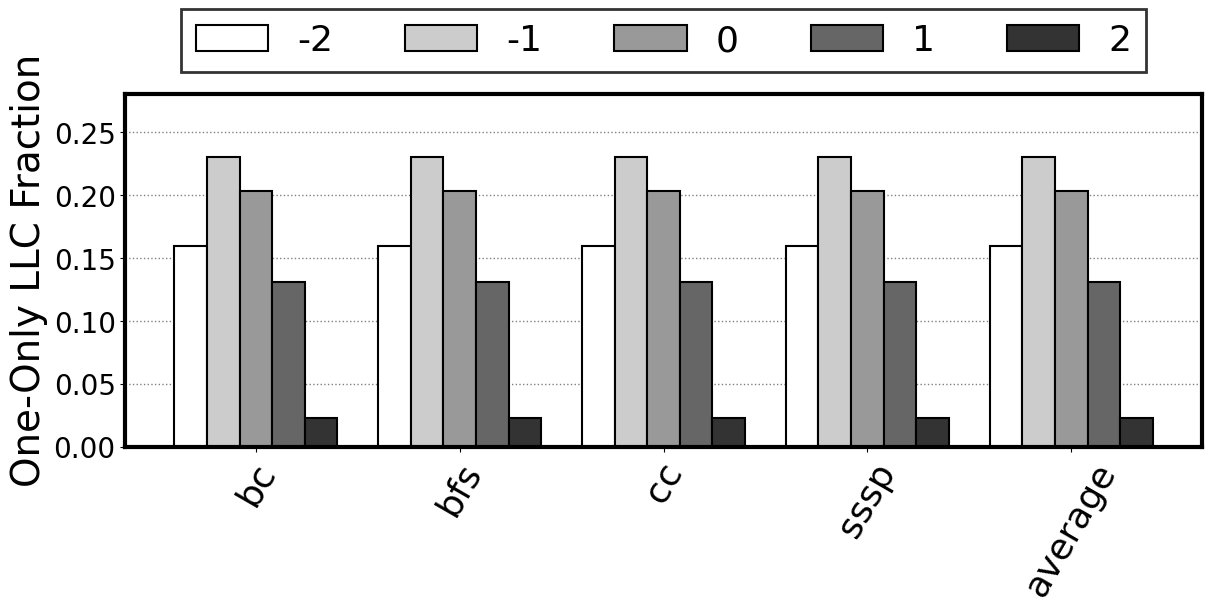

In [15]:

# print("final allocated fractions: ",final_data_allocated)
# print("final shared fraction: ",final_data_shared)
# print("final core1 unique fraction: ",final_data_coreOne)
# print("final core0 unique fraction: ",final_data_coreZero)

plot_multibar(final_data_allocated,["-2","-1","0","1","2"],"./plots/allocated.pdf",is_mpki=False,delta_factor=2,ylabel="Allocated LLC Fraction")
plot_multibar(final_data_shared,["-2","-1","0","1","2"],"./plots/shared.pdf",is_mpki=False,delta_factor=2,ylabel="Shared LLC Fraction")
plot_multibar(final_data_coreZero,["-2","-1","0","1","2"],"./plots/coreZero.pdf",is_mpki=False,delta_factor=2.5,ylabel="Zero-Only LLC Fraction",ytick_trim=2)
plot_multibar(final_data_coreOne,["-2","-1","0","1","2"],"./plots/coreOne.pdf",is_mpki=False,delta_factor=2.5,ylabel="One-Only LLC Fraction",ytick_trim=2)

In [28]:
import os
import re

def process_log_files(directory, output_file):
    # Regular expression to match the desired pattern
    ipc_pattern = re.compile(r"^LLC TOTAL.*MISS:\s*(\d+)")

    with open(output_file, 'w') as out_file:
        for file_name in os.listdir(directory):
            file_path = os.path.join(directory, file_name)
            if os.path.isfile(file_path):  # Ensure it's a file
                try:
                    with open(file_path, 'r', encoding='utf-8', errors='ignore') as log_file:
                        ipc_values = []
                        for line in log_file:
                            match = ipc_pattern.search(line)
                            if match:
                                ipc_values.append(float(match.group(1)))
                        
                        if ipc_values:
                            avg_ipc = sum(ipc_values) / len(ipc_values)
                            out_file.write(f"{file_name} : {avg_ipc:.6f}\n")
                        else:
                            out_file.write(f"{file_name} : No IPC values found\n")
                except Exception as e:
                    out_file.write(f"{file_name} : Error processing file ({e})\n")

# Replace '/path/to/directory' with the directory containing log files
process_log_files('./Results/combined/', 'avgs.txt')


In [29]:
def sort_log_file(input_file, output_file):
    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    # Sort lines alphabetically by the file name
    sorted_lines = sorted(lines, key=lambda line: line.split(" : ")[0])

    # Write the sorted lines to the output file
    with open(output_file, 'w') as outfile:
        outfile.writelines(sorted_lines)

# Replace 'log_file.txt' with your input file and 'sorted_log_file.txt' with your desired output file
sort_log_file('avgs.txt', 'sorted_avgs.txt')


In [30]:
def process_log_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            # Remove any leading/trailing whitespaces
            line = line.strip()

            # Split the line based on the first occurrence of ' : ' to separate filename + core type from IPC value
            filename_and_core, ipc_value = line.split(" : ")
            # print(filename_and_core)
            # Further split the filename_and_core into log name and core type based on the pattern observed
            parts = filename_and_core.split(".")

            # The log file name is everything before the last dot
            log_name = ".".join(parts[:-1])

            # The core type is after the last dot, like 'Exclusive-16core'
            core_type = parts[-1]

            # Write the formatted line into the output file
            outfile.write(f"{log_name} : {core_type} : {ipc_value}\n")

# Usage example (replace 'input.txt' and 'output.txt' with your actual file names)
process_log_file('sorted_avgs.txt', 'configs.txt')


In [40]:
import json
from collections import defaultdict
from math import prod  # For calculating the product of a list
def process_log_file(file_path,exclusive_name,reExclusive_name):
    
    # Dictionary to store values by category
    data = defaultdict(list)

    # Read the input file
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into parts
            parts = line.strip().split(" : ")
            if len(parts) != 3:
                continue  # Skip invalid lines

            log_summary, core_type, value = parts

            # Extract the key from the log_summary
            try:
                key = ''.join(filter(str.isalpha, log_summary.split("log_summary_")[1]))
            except IndexError:
                continue  # Skip lines where the key can't be extracted

            # Convert value to float
            try:
                value = float(value)
            except ValueError:
                continue

            # Add the value to the corresponding key in the dictionary
            data[(key, core_type)].append(value)

    # Calculate the averages for each category
    result = {}
    speedups = []  # List to store individual geometric mean speedups
    for key in set(k[0] for k in data.keys()):
        exclusive_values = data.get((key, exclusive_name), [])
        reexclusive_values = data.get((key, reExclusive_name), [])

        if exclusive_values and reexclusive_values:
            # Calculate average ratio using geometric mean
            try:
                ratio_sum = prod(
                    r / e for r, e in zip(reexclusive_values, exclusive_values) if e != 0
                )
                geomean_speedup = ratio_sum ** (1 / len(exclusive_values))
                result[key] = geomean_speedup
                speedups.append(geomean_speedup)
            except ZeroDivisionError:
                continue  # Skip if division by zero occurs

    # Calculate the net geometric mean speedup
    if speedups:
        net_geomean_speedup = prod(speedups) ** (1 / len(speedups))
    else:
        net_geomean_speedup = None

    return result, net_geomean_speedup

def replace_champsim(filename):
    try:
        with open(filename, 'r') as file:
            content = file.read()
        
        updated_content = content.replace("champsim_", "")
        updated_content = updated_content.replace("champsimtrace_","")
        updated_content = updated_content.replace("trace_","")
        
        with open(filename, 'w') as file:
            file.write(updated_content)
        
        print(f"Replaced all occurrences of 'champsim_' in {filename}")
    except Exception as e:
        print(f"Error: {e}")

# import sys
# import os
# # if __name__ == '__main__':
#     # Usage

# if (len(sys.argv) != 4):
#     print("Usage : python3 getRatios.py <file name with .json extension> <exclusive name> <re-exclusive name>")
#     exit()

file_path = "configs.txt"  # Replace with your input file path
replace_champsim(file_path)
averages, net_geomean_speedup = process_log_file(file_path,"noninclusive","coverage_0")
# print(averages)
# exit()
averages["Geomean"] = net_geomean_speedup
with open(f"./coverage_0.json", "w") as file:
    json.dump(averages, file, indent=4)


Replaced all occurrences of 'champsim_' in configs.txt


In [43]:
import json
from collections import defaultdict
from math import prod  # For calculating the product of a list
def process_log_file_mpki(file_path,reExclusive_name):
    
    # Dictionary to store values by category
    data = defaultdict(list)

    # Read the input file
    with open(file_path, 'r') as file:
        for line in file:
            # Split the line into parts
            parts = line.strip().split(" : ")
            if len(parts) != 3:
                continue  # Skip invalid lines

            log_summary, core_type, value = parts

            # Extract the key from the log_summary
            try:
                key = ''.join(filter(str.isalpha, log_summary.split("log_summary_")[1]))
            except IndexError:
                continue  # Skip lines where the key can't be extracted

            # Convert value to float
            try:
                value = float(value)
            except ValueError:
                continue

            # Add the value to the corresponding key in the dictionary
            data[(key, core_type)].append(value)

    # Calculate the averages for each category
    result = {}
    speedups = []  # List to store individual geometric mean speedups
    print(data)
    for key in set(k[0] for k in data.keys()):
        reexclusive_values = data.get((key, reExclusive_name), [])

        if reexclusive_values:
            averageVal = sum(r for r in reexclusive_values)
            averageVal /= len(reexclusive_values)
            result[key] = averageVal
            speedups.append(averageVal)

    # Calculate the net geometric mean speedup
    if speedups:
        net_geomean_speedup = sum(speedups) * (1 / len(speedups))
    else:
        net_geomean_speedup = None

    return result, net_geomean_speedup

def replace_champsim(filename):
    try:
        with open(filename, 'r') as file:
            content = file.read()
        
        updated_content = content.replace("champsim_", "")
        updated_content = updated_content.replace("champsimtrace_","")
        updated_content = updated_content.replace("trace_","")
        
        with open(filename, 'w') as file:
            file.write(updated_content)
        
        print(f"Replaced all occurrences of 'champsim_' in {filename}")
    except Exception as e:
        print(f"Error: {e}")

file_path = "configs.txt"  # Replace with your input file path
replace_champsim(file_path)
averages, net_geomean_speedup = process_log_file_mpki(file_path,"coverage_0")
# print(averages)
# exit()
averages["average"] = net_geomean_speedup
with open(f"./coverage_0-mpki.json", "w") as file:
    json.dump(averages, file, indent=4)


Replaced all occurrences of 'champsim_' in configs.txt
defaultdict(<class 'list'>, {('bc', 'coverage_-1'): [6933408.0, 7083994.75, 6484662.5, 7229771.25], ('bc', 'coverage_-2'): [8010637.0, 8219835.25, 7488189.0, 8549483.75], ('bc', 'coverage_0'): [6465747.5, 6596861.5, 6032661.25, 6659132.0], ('bc', 'coverage_1'): [5684422.0, 5775154.25, 5316964.25, 5754615.75], ('bc', 'coverage_2'): [5980145.5, 6085425.5, 5583439.5, 6091743.25], ('bc', 'noninclusive'): [4826508.75, 4891798.5, 4506103.0, 4803248.5], ('bfs', 'coverage_-1'): [1827169.25, 1852625.0, 2064344.25, 1766519.5], ('bfs', 'coverage_-2'): [1886861.0, 1912558.0, 2193837.0, 1827808.0], ('bfs', 'coverage_0'): [1815809.25, 1837442.75, 2020112.5, 1748464.5], ('bfs', 'coverage_1'): [1770656.0, 1791129.25, 1928153.25, 1700635.25], ('bfs', 'coverage_2'): [1789091.25, 1811098.0, 1963974.5, 1720972.5], ('bfs', 'noninclusive'): [1687798.0, 1704933.75, 1798970.5, 1624236.5], ('cc', 'coverage_-1'): [3703652.5, 3618498.5, 3545279.5, 3972199.75

In [46]:
import json
import glob
import re

# Get all JSON files that match the pattern
json_files = glob.glob("./coverage_*-mpki.json")

# Function to extract the numeric part for sorting
def extract_number(filename):
    match = re.search(r"coverage_(-?\d+)\-mpki.json", filename)
    return int(match.group(1)) if match else float('inf')

# Sort the files based on the number in the filename
json_files.sort(key=extract_number)

# Merge the data
merged_data = {}

for file in json_files:
    with open(file, 'r') as f:
        data = json.load(f)
        for key, value in data.items():
            merged_data.setdefault(key, []).append(value)

# Save to a new JSON file
with open("coverage-mpki.json", "w") as f:
    json.dump(merged_data, f, indent=4)


['-2', '-1', '0', '1', '2']
{'bfs': [0.9612050481868253, 0.970859168836388, 0.9761059082253116, 0.9818748676184634, 0.9795850755138049], 'sssp': [0.7493904330848435, 0.818884668773463, 0.8673165288545339, 0.9246508797977796, 0.9030781355836479], 'bc': [0.7692183619557426, 0.8310533033793872, 0.8790824042036876, 0.9382015363371139, 0.9158247528131694], 'cc': [0.6880355101665322, 0.7708577478345083, 0.8310155987616137, 0.9077494072524548, 0.8791596978700887], 'Geomean': [0.7857713154122052, 0.8447836981844274, 0.8868054059793986, 0.9377217971470826, 0.9186750232057583]}
Max: 0.9818748676184634
Min: 0.6880355101665322
Delta: 0.05


/tmp/ipykernel_33340/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


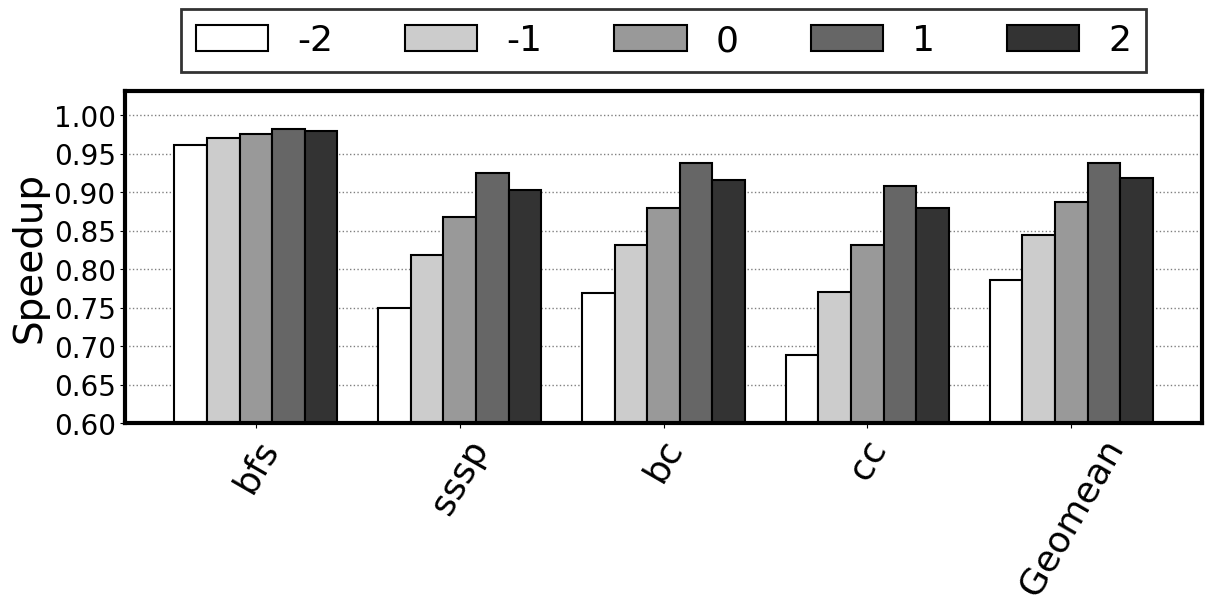

In [58]:
import json

with open("coverage.json", "r") as f:
    data = json.load(f)
# Now `data` is a Python dictionary
# print(data)

plot_multibar(data,["-2","-1","0","1","2"],"./plots/coverage-ipc.pdf",is_mpki=False,delta_factor=2.5,ytick_trim=2)

['-2', '-1', '0', '1', '2', 'NI']
{'bfs': [19.55266, 18.776645, 18.5545725, 17.976434375, 18.212840625, 17.039846875], 'sssp': [37.948668125, 32.461911875, 29.67329625, 26.205491875, 27.43742, 22.143416875], 'bc': [80.6703625, 69.32959125, 64.386005625, 56.327890625, 59.351884375, 47.569146875], 'cc': [44.55282125, 37.099075625, 32.881195625, 28.25326125, 29.863674375, 23.6139875], 'average': [45.68112796875, 39.4168059375, 36.3737675, 32.19076953125, 33.71645484375, 27.59159953125]}
Max: 80.6703625
Min: 17.039846875
Delta: 10


/tmp/ipykernel_33340/337514214.py:66: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(top=0.8,left=0.1, right=0.9)


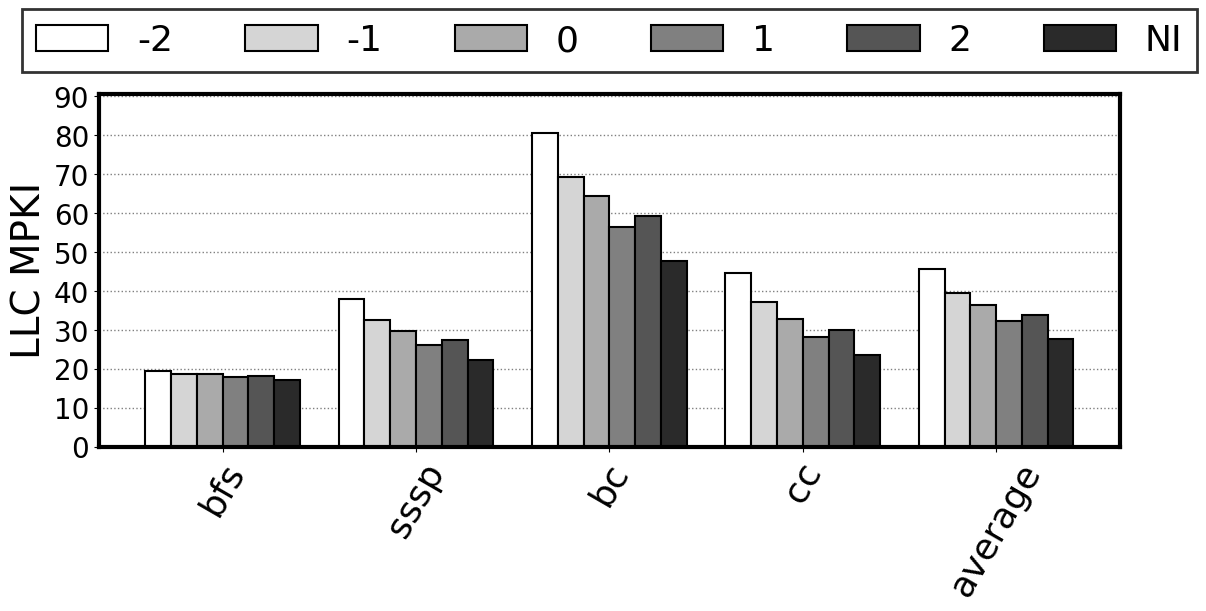

In [57]:
import json

with open("coverage-mpki.json", "r") as f:
    data = json.load(f)


newData = {}

for i in data:
    newData[i] = []
    for j in data[i]:
        newData[i].append(j/100000)

plot_multibar(newData,["-2","-1","0","1","2","NI"],"./plots/coverage-mpki.pdf",is_mpki=True,delta_factor=2,ytick_trim=0,delta_round=5,round_to=10)